In [2]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1 -> 23.3.1
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string
import joblib

In [3]:
# import gunicorn
# print(gunicorn.__version__)

In [4]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')
# data_true = pd.read_csv('/content/drive/MyDrive/học/PBL 6/code/my_array.csv')

In [5]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
data_fake["class"]=0
data_true["class"]=1

In [7]:
data_fake.shape, data_true.shape

((23481, 5), (21956, 5))

In [8]:
data_fake_maniual_testing = data_fake.tail(10)
for i in range(15480,15470,-1):
    data_fake.drop([i],axis =0, inplace = True)

data_true_maniual_testing = data_true.tail(10)
for i in range(15416,15406,-1):
    data_true.drop([i],axis=0, inplace = True)

In [9]:
data_fake.shape, data_true.shape

((23471, 5), (21946, 5))

In [10]:
data_fake_maniual_testing['class']= 0
data_true_maniual_testing['class']= 1


C:\Users\Admin\AppData\Local\Temp\ipykernel_9964\1023032828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_maniual_testing['class']= 0
C:\Users\Admin\AppData\Local\Temp\ipykernel_9964\1023032828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_maniual_testing['class']= 1


In [11]:
data_true_maniual_testing.head()


,title,text,subject,date,class
21946,Former Alabama lawmaker pleads guilty to voter...,"MONTGOMERY, Ala. (AP) — A former Alabama lawma...",article,11-Oct-23,1
21947,House Republicans are running into trouble try...,WASHINGTON (AP) — Stalemated over a new House ...,article,11-Oct-23,1
21948,3 scientists win Nobel in chemistry for quantu...,STOCKHOLM (AP) — Three scientists won the Nobe...,article,11-Oct-23,1
21949,NASA says more science and less stigma are nee...,"CAPE CANAVERAL, Fla. (AP) — NASA said Thursday...",article,11-Oct-23,1
21950,"At least 16 migrants killed, 29 injured in a b...",MEXICO CITY (AP) — At least 16 migrants from V...,article,11-Oct-23,1


In [12]:
data_fake_maniual_testing.head


<bound method NDFrame.head of                                                    title  \
23471  Seven Iranians freed in the prisoner swap have...   
23472                      #Hashtag Hell & The Fake Left   
23473  Astroturfing: Journalist Reveals Brainwashing ...   
23474          The New American Century: An Era of Fraud   
23475  Hillary Clinton: ‘Israel First’ (and no peace ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
23471  21st Century Wire says This week, the historic...  Middle-east   
23472   By Dady Chery and Gilbert MercierAll writers ...  Middle-east   
23473  Vic Bishop Waking TimesOur reality is carefull...  Middle-east   
23474  Paul Craig

In [13]:
data_merge = pd.concat([data_fake, data_true], axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
data = data_merge.drop(['title','subject','date'],axis=1)

In [16]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [17]:
data = data.sample(frac=1)

In [18]:
data.head()

,text,class
15807,ROME (Reuters) - Pope Francis made one of his ...,1
8490,"FORT LAUDERDALE, Fla. (Reuters) - Republican p...",1
8459,"CHILMARK, Mass. (Reuters) - Declaring he was t...",1
5145,More proof that Donald Trump s presidential ca...,0
2088,"Since taking the oath of office, alleged presi...",0


In [19]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [20]:
data['text_length'] = data['text'].apply(len)
data.head()

,text,class,text_length
0,ROME (Reuters) - Pope Francis made one of his ...,1,3122
1,"FORT LAUDERDALE, Fla. (Reuters) - Republican p...",1,3107
2,"CHILMARK, Mass. (Reuters) - Declaring he was t...",1,1779
3,More proof that Donald Trump s presidential ca...,0,2669
4,"Since taking the oath of office, alleged presi...",0,3319


In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    # print(text)
    text = re.sub("\\W"," ",text )
    # print(text)
    text = re.sub('http?://\S+|www\.\S+','',text)
    # print(text)
    text = re.sub('<.*?>+','',text)
    # print(text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    # print(text)
    text = re.sub('\n','',text)
    # print(text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [22]:
data['text']= data['text'].apply(wordopt)

In [23]:
# from matplotlib import pyplot as plt
# _df_5['text_length'].plot(kind='line', figsize=(8, 4), title='text_length')
# plt.gca().spines[['top', 'right']].set_visible(False)

In [24]:
# import matplotlib.pyplot as plt

# # Đọc dữ liệu từ tệp CSV vào một DataFrame
# # data = pd.read_csv("data.csv")

# # Tính tỷ lệ xuất hiện của mỗi giá trị trong cột "column_name"
# value_counts = data['text_length'].value_counts(normalize=True)

# # Vẽ biểu đồ cột của tỷ lệ xuất hiện
# plt.figure(figsize=(10, 6))
# value_counts.plot(kind='bar')
# plt.title('Biểu đồ Tỉ lệ Xuất hiện của Giá Trị trong Cột')
# plt.xlabel('Giá Trị')
# plt.ylabel('Tỉ lệ xuất hiện')
# plt.show()

In [25]:
import math
data['round_text_length'] = data['text_length']/1000
data['round_text_length'] = data['round_text_length'].apply(lambda x: math.ceil(x))
data['round_text_length'] = data['round_text_length']*1000
data.head()





,text,class,text_length,round_text_length
0,rome reuters pope francis made one of his ...,1,3122,4000
1,fort lauderdale fla reuters republican p...,1,3107,4000
2,chilmark mass reuters declaring he was t...,1,1779,2000
3,more proof that donald trump s presidential ca...,0,2669,3000
4,since taking the oath of office alleged presi...,0,3319,4000


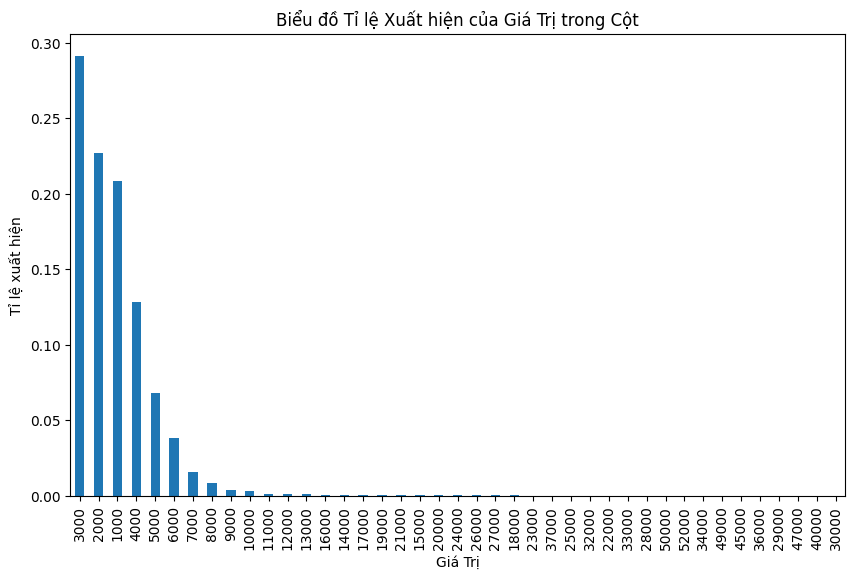

In [26]:
# Tính tỷ lệ xuất hiện của mỗi giá trị trong cột "column_name"
value_counts = data['round_text_length'].value_counts(normalize=True)

# Vẽ biểu đồ cột của tỷ lệ xuất hiện
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Biểu đồ Tỉ lệ Xuất hiện của Giá Trị trong Cột')
plt.xlabel('Giá Trị')
plt.ylabel('Tỉ lệ xuất hiện')
plt.show()

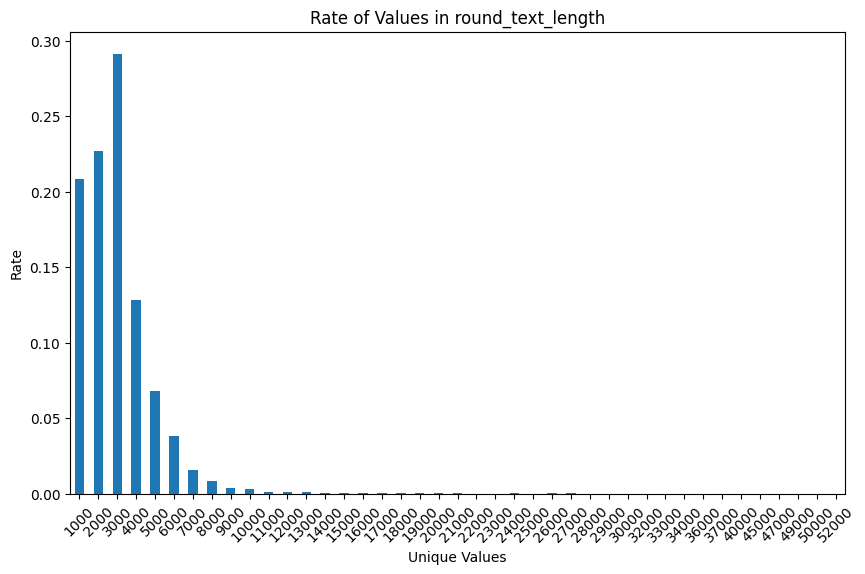

In [27]:

data_bk = data

column_name = 'round_text_length'
# Calculate the value counts (frequencies)
value_counts = data_bk['round_text_length'].value_counts()

# Sort the values by index (unique values)
value_counts = value_counts.sort_index()

# Calculate the total count for normalization
total_count = value_counts.sum()

# Calculate the rate (frequency normalized to total count)
rate = value_counts / total_count

# Create the bar plot
plt.figure(figsize=(10, 6))
rate.plot(kind='bar')
plt.title("Rate of Values in " + column_name)
plt.xlabel("Unique Values")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.show()


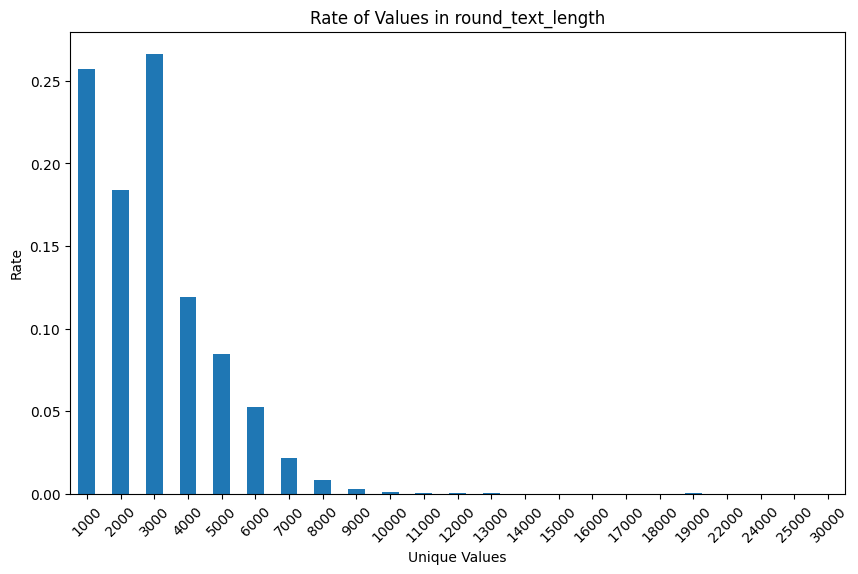

In [28]:
data_bkt = data[data['class'] == 1]


# Calculate the value counts (frequencies)
value_counts = data_bkt['round_text_length'].value_counts()

# Sort the values by index (unique values)
value_counts = value_counts.sort_index()

# Calculate the total count for normalization
total_count = value_counts.sum()

# Calculate the rate (frequency normalized to total count)
rate = value_counts / total_count

# Create the bar plot
plt.figure(figsize=(10, 6))
rate.plot(kind='bar')
plt.title("Rate of Values in " + column_name)
plt.xlabel("Unique Values")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.show()

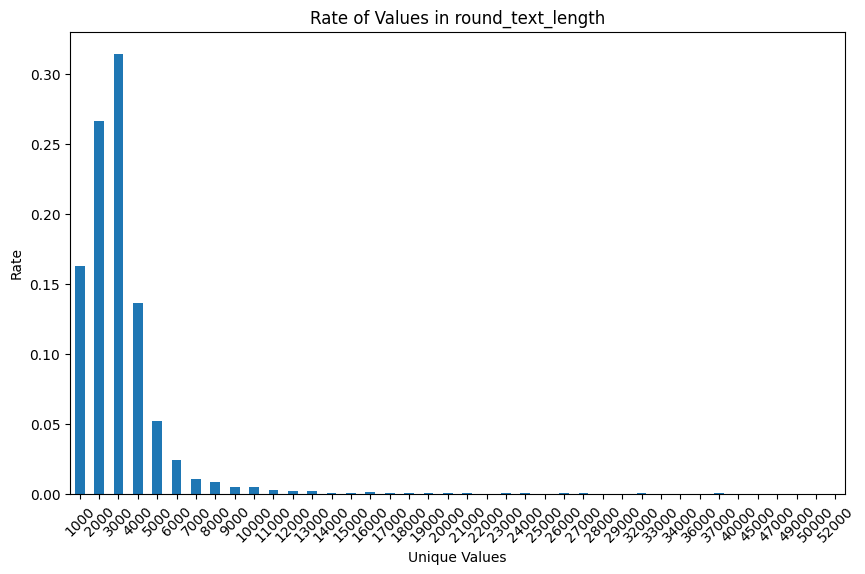

In [29]:
data_bkt = data[data['class'] == 0]


# Calculate the value counts (frequencies)
value_counts = data_bkt['round_text_length'].value_counts()

# Sort the values by index (unique values)
value_counts = value_counts.sort_index()

# Calculate the total count for normalization
total_count = value_counts.sum()

# Calculate the rate (frequency normalized to total count)
rate = value_counts / total_count

# Create the bar plot
plt.figure(figsize=(10, 6))
rate.plot(kind='bar')
plt.title("Rate of Values in " + column_name)
plt.xlabel("Unique Values")
plt.ylabel("Rate")
plt.xticks(rotation=45)
plt.show()

In [30]:

total_count = 0
value_counts = 0
for i in range(1, 54, 1):
    # Code to be executed in each iteration
  i=i*1000
  data_bk1000 = data[(data['round_text_length'] < i) & (data['round_text_length'] >= (i-1000))]

  # Calculate the value counts (frequencies)
  value_counts = data_bk1000['class'].value_counts()

  # Calculate the total count for normalization
  total_count = value_counts.sum()

  # Calculate the rate (frequency normalized to total count)
  rate = value_counts / total_count
  # print(i,"....",rate,"----",total_count)
  print(rate)
  # Create the bar plot
  # plt.figure(figsize=(10, 6))
  # rate.plot(kind='bar')
  # plt.title("Rate of Values in " + column_name)
  # string = "Unique Values: " + str(i)
  # plt.xlabel(i,string)
  # plt.ylabel("Rate")
  # plt.xticks(rotation=45)
  # plt.show()


Series([], Name: class, dtype: float64)
1    0.596343
0    0.403657
Name: class, dtype: float64
0    0.608472
1    0.391528
Name: class, dtype: float64
0    0.558117
1    0.441883
Name: class, dtype: float64
0    0.549725
1    0.450275
Name: class, dtype: float64
1    0.602784
0    0.397216
Name: class, dtype: float64
1    0.66956
0    0.33044
Name: class, dtype: float64
1    0.662465
0    0.337535
Name: class, dtype: float64
0    0.524934
1    0.475066
Name: class, dtype: float64
0    0.654054
1    0.345946
Name: class, dtype: float64
0    0.834483
1    0.165517
Name: class, dtype: float64
0    0.846154
1    0.153846
Name: class, dtype: float64
0    0.824561
1    0.175439
Name: class, dtype: float64
0    0.803922
1    0.196078
Name: class, dtype: float64
0    0.952381
1    0.047619
Name: class, dtype: float64
0    0.833333
1    0.166667
Name: class, dtype: float64
0    0.92
1    0.08
Name: class, dtype: float64
0    0.947368
1    0.052632
Name: class, dtype: float64
0    0.75
1    0.2

In [31]:
print(data)

                                                    text  class  text_length  \
0      rome  reuters    pope francis made one of his ...      1         3122   
1      fort lauderdale  fla   reuters    republican p...      1         3107   
2      chilmark  mass   reuters    declaring he was t...      1         1779   
3      more proof that donald trump s presidential ca...      0         2669   
4      since taking the oath of office  alleged presi...      0         3319   
...                                                  ...    ...          ...   
45412  new delhi  reuters    india s ruling bharatiya...      1         2955   
45413  berlin  reuters    germany hopes to resume its...      1         1539   
45414  brussels  reuters    u s  secretary of state j...      1         1999   
45415  a republican senator has compared president ob...      0         1850   
45416  earlier today  the disgraced former host of ms...      0         2784   

       round_text_length  
0           

In [32]:
data.columns

Index(['text', 'class', 'text_length', 'round_text_length'], dtype='object')

In [33]:
unique_categories = data['text_length'].unique()


print((unique_categories), max(unique_categories))

[3122 3107 1779 ... 6811 4708 8418] 51794


In [34]:
x=data['text']
y=data['class']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [36]:
# x_train.columns

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
joblib.dump(vectorization, 'vectorization.joblib')


['vectorization.joblib']

In [38]:
# Lưu tập huấn luyện X_train vào tệp .pkl
joblib.dump(x_train, 'X_train.joblib')

# Lưu tập huấn luyện y_train vào tệp .pkl
joblib.dump(y_train, 'y_train.joblib')
# Lưu tập huấn luyện X_train vào tệp .pkl
joblib.dump(x_test, 'X_test.joblib')

# Lưu tập huấn luyện y_train vào tệp .pkl
joblib.dump(y_test, 'y_test.joblib')

['y_test.joblib']

In [39]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])
pipeline_lr.fit(x_train, y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [40]:
pred_lr = pipeline_lr.predict(x_test)


In [41]:
pipeline_lr.score(x_test, y_test)
joblib.dump(pipeline_lr, 'pipeline_lr.joblib')

['pipeline_lr.joblib']

In [42]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5772
           1       0.98      0.99      0.98      5583

    accuracy                           0.98     11355
   macro avg       0.98      0.98      0.98     11355
weighted avg       0.98      0.98      0.98     11355



In [43]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
pipeline_dt = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', DecisionTreeClassifier())
])
pipeline_dt.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [44]:
pred_dt = pipeline_dt.predict(x_test)

In [45]:
pipeline_dt.score(x_test, y_test)
joblib.dump(pipeline_dt, 'pipeline_dt.joblib')

['pipeline_dt.joblib']

In [46]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5772
           1       0.99      0.99      0.99      5583

    accuracy                           0.99     11355
   macro avg       0.99      0.99      0.99     11355
weighted avg       0.99      0.99      0.99     11355



In [47]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
pipeline_gb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('GradientBoostingClassifier', GradientBoostingClassifier())
])
pipeline_gb.fit(x_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('GradientBoostingClassifier', GradientBoostingClassifier())])

In [48]:
predict_gb = pipeline_gb.predict(x_test)

In [49]:
pipeline_gb.score(x_test, y_test)
joblib.dump(pipeline_gb, 'pipeline_gb.joblib')


['pipeline_gb.joblib']

In [50]:
print(classification_report(y_test, predict_gb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5772
           1       0.99      0.99      0.99      5583

    accuracy                           0.99     11355
   macro avg       0.99      0.99      0.99     11355
weighted avg       0.99      0.99      0.99     11355



In [51]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])
pipeline_rf.fit(x_train, y_train)


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [52]:
predict_rf = pipeline_rf.predict(x_test)

In [53]:
pipeline_rf.score(x_test, y_test)
joblib.dump(pipeline_rf, 'pipeline_rf.joblib')

['pipeline_rf.joblib']

In [54]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5772
           1       0.99      0.98      0.98      5583

    accuracy                           0.98     11355
   macro avg       0.98      0.98      0.98     11355
weighted avg       0.98      0.98      0.98     11355



In [55]:
# def output_lable(n):
#     if n==0:
#         return "Fake NEWS"
#     elif n==1:
#         return "Real NEWS"

# def manual_testing(news):
#     testing_news = {'text':[news]}
#     # print("tẽt",news)
#     new_def_test = pd.DataFrame(testing_news)
#     new_def_test["text"] = new_def_test["text"].apply(wordopt)
#     new_x_test = new_def_test["text"]
#     print("len",new_x_test)
#     new_xv_test = vectorization.transform(new_x_test)
#     pred_dt=DT.predict(new_xv_test)
#     pred_lr = LR.predict(new_xv_test)
#     predict_gb=GB.predict(new_xv_test)
#     predict_rf=RF.predict(new_xv_test)

#     return print("\n\nDT Prediction: {} \nLR Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(
#                     output_lable(pred_dt[0]),
#                     output_lable(pred_lr[0]),
#                     output_lable(predict_gb[0]),
#                     output_lable(predict_rf[0])
#                    ))
#     # return print("\n\nRF Prediction: {}".format(
#     #                 output_lable(pred_lr[0]),
#     #                 output_lable(predict_rf[0])
#     #                ))


In [27]:
import joblib
import re
import pandas as pd
import string


def wordopt(text):
    text = re.findall(r'<a\s+href="(.*?)"', text)
    text = " ".join(map(str, text))
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub("\\W"," ",text )
    text = re.sub('http?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text
def output_lable(n):
    if n==0:
        return "Fake NEWS"
    elif n==1:
        return "Real NEWS"
vectorization = joblib.load('vectorization.joblib')
pipeline_lr = joblib.load('pipeline_lr.joblib')
pipeline_dt = joblib.load('pipeline_dt.joblib')
pipeline_rf = joblib.load('pipeline_rf.joblib')
pipeline_gb = joblib.load('pipeline_gb.joblib')
def manual_testing(news):
    testing_news = {'text':[news]}
    
    # print("tẽt",news)
    new_def_test = pd.DataFrame(testing_news)
    vectorization.fit(new_def_test)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_tes = vectorization.transform(new_x_test)
    # print(type(new_xv_test))
    # new_xv_test = csr_matrix(new_x_test)
    # print("len",new_x_test)
    new_xv_test = vectorization.transform(new_x_test)
    pred_dt=pipeline_dt.predict(new_xv_test)
    pred_lr = pipeline_lr.predict(new_def_test)
    predict_gb=pipeline_gb.predict(new_def_test)
    predict_rf=pipeline_rf.predict(new_def_test)

    return print("\n\nDT Prediction: {} \nLR Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(
                    output_lable(pred_dt[0]),
                    output_lable(pred_lr[0]),
                    output_lable(predict_gb[0]),
                    output_lable(predict_rf[0])
                   ))


In [29]:
str = """WASHINGTON (AP) — With little time left to prevent a government shutdown, the House is in a familiar position: effectively paralyzed as conservatives feud with Speaker Kevin McCarthy over matters large and small. McCarthy has pushed the Republican conference to embrace a short-term funding plan that would also include a sweeping Republican proposal for the southern border. But a small group of hardline conservatives has defied the speaker in a quest to get rid of stopgap funding plans, known as continuing resolutions, even if opposing them means forcing a government shutdown. It’s left McCarthy at an impasse. He will likely be left with the political damage of a shutdown unless he turns to Democrats for help in passing a bipartisan bill. But working with Democrats would give hard-right Republicans reason to remove him as speaker."""

res = manual_testing(str)

AttributeError: lower not found

In [20]:
news = input()
manual_testing(news)
print(len(news))
#chỉ nên tin RF :)



DT Prediction: Fake NEWS 
LR Prediction: Fake NEWS 
GB Prediction: Fake NEWS 
RF Prediction: Fake NEWS
2150


In [59]:
print(LR.feature_names_in_)

AttributeError: 'LogisticRegression' object has no attribute 'feature_names_in_'

In [ ]:
# text1 = "The question is whether anyone in power will listen."
# text2 = input()

# if text1 in text2:
#   print("Text1 is a substring of Text2")
# else:
#   print("...")

f
...


In [ ]:
# manual_testing("WASHINGTON (AP) — With little time left to prevent a government shutdown, the House is in a familiar position: effectively paralyzed as conservatives feud with Speaker Kevin McCarthy over matters large and small.

# McCarthy has pushed the Republican conference to embrace a short-term funding plan that would also include a sweeping Republican proposal for the southern border. But a small group of hardline conservatives has defied the speaker in a quest to get rid of stopgap funding plans, known as continuing resolutions, even if opposing them means forcing a government shutdown.

# It’s left McCarthy at an impasse. He will likely be left with the political damage of a shutdown unless he turns to Democrats for help in passing a bipartisan bill. But working with Democrats would give hard-right Republicans reason to remove him as speaker.")

SyntaxError: EOL while scanning string literal (861917238.py, line 1)

In [ ]:
# manual_testing("NATO Secretary General Jens Stoltenberg has warned that the war in Ukraine could be long, as Kyiv’s counteroffensive against Russia continues to make only marginal gains. Ukraine’s allies have sought to accentuate campaign gains in recent weeks, but it has been underway for months with no major breakthroughs. The fall will bring changing conditions on the ground and the possibility that Russia will once again try to pummel Ukrainian energy infrastructure.“Most wars last longer than is expected when they first start. Therefore, we must prepare ourselves for a long war in Ukraine,” Stoltenberg said in an interview with German newspaper Berliner Morgenpost published Sunday.“We are all wishing for a quick peace. But at the same time, we must recognize: If President Zelensky and the Ukrainians give up the fight, their country would not exist anymore. If President Putin and Russia laid down their weapons, we would have peace,” the NATO chief said.“The easiest way to end this war would be if Putin withdrew his troops,” he added.On the possibility of Putin using nuclear weapons in Ukraine, Stoltenberg said: “Putin’s nuclear rhetoric is dangerous and ruthless, but NATO is prepared for every threat and challenge.")

In [ ]:
manual_testing("At least 16 people have been killed and 36 more injured following a bus crash Tuesday on central Mexico’s Cuacnopalan-Oaxaca highway, according to officials.The bus, which was carrying locals and migrants, collided with a trailer truck on the highway near the border between the states of Oaxaca and Puebla, Oaxaca’s Prosecutor’s Office said in a statement.The traffic accident killed at least eight men and eight women, including one minor. The injured were transferred to hospitals in Puebla for medical attention.The reason for the collision is unknown, but the prosecutor’s office has said they will conduct an expert-led investigation to uncover what events unfolded that led up to the crash and determine if anyone should be held liable.“I have instructed the heads of the relevant authorities to collaborate and support the injured people,” the governor of Oaxaca, Salomón Jara Cruz, said on X, formally known as Twitter. “We send a hug and condolences to the families of the deceased, to whom we will also provide all our support.”Puebla’s interior ministry said it is in communication with federal government agencies and state authorities on how best to support the victims.")

In [ ]:
manual_testing('A confluence of crises jarring America’s political, democratic, judicial and economic systems, often fueled by Donald Trump and far-right Republicans, threatens to severely test Joe Biden’s presidency amid rising doubts over his reelection bid.As the 2024 White House race heats up, it’s becoming clear that extraordinary, historic challenges complicate Biden’s push for a second term, over and above the liabilities expressed in his low presidential approval ratings and the uneven economy.Even by the standards of recent years, in which democracy has wobbled and fierce political recrimination deepened, the country is heading into a political morass without parallel.The front-runner for the Republican nomination is a twice-impeached ex-president – Trump – who is facing four criminal trials and has never shelved his attempt to overturn the American democratic system of fair elections.Biden now faces his own impeachment drama after pro-Trump Republicans, despite a paucity of evidence of abuses of power, opened an investigation seeking to tie him to his son Hunter’s alleged influence-peddling in China and Ukraine. Biden is also reeling after his surviving son last week became the only child of a sitting president to be indicted.The House Republican majority, beset by infighting and radicalization, has threatened to choke off federal funding and may shut down the government by the end of the month after its most extreme members demanded massive spending cuts it has no power to enact given opposition by the Senate and the White House. The showdown is increasingly an existential threat to GOP Speaker Kevin McCarthy.The octogenarian president is increasingly coming under scrutiny over his ability to serve a full second term if he wins in November 2024. It’s a legitimate question that many Americans share but that the White House struggles to answer.A sense of building national malaise is encapsulated by two strikes hobbling two industries that had outsize influence on the mythology of US cultural power and global dominance in the 20th century: automobiles and Hollywood.Washington’s festering political mess could have international implications as hard-line Republicans seek to halt billions of dollars of US aid to Ukraine as it fights Russia’s invasion. President Volodymyr Zelensky is due to travel to Washington this week to seek to shore up the lifeline, but Trump warned on NBC’s “Meet the Press” that if he wins in 2024 he plans to get Zelensky and Vladimir Putin “into a room” and broker a deal – a scenario likely to swing heavily to the Russian strongman’s demands.All of this is occurring at a time when no one in either party appears to have the power to push aside the two dominant political figures – Biden and Trump, who are the most likely combatants in a presidential race next year that polls show few Americans want.')